# Chronic Kidney Disease

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Data Set Information:
1.  Age (numerical): age in years
2.  Blood Pressure (numerical): bp in mm/Hg
3.  Specific Gravity (nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.  Albumin (nominal): al - (0,1,2,3,4,5)
5.  Sugar (nominal): su - (0,1,2,3,4,5)
6.  Red Blood Cells (nominal): rbc - (normal, abnormal)
7.  Pus Cell (nominal): pc - (normal,abnormal)
8.  Pus Cell Clumps (nominal): pcc - (present, notpresent)
9.  Bacteria (nominal): ba - (present, notpresent)
10. Blood Glucose Random (numerical): bgr in mgs/dl
11. Blood Urea (numerical): bu in mgs/dl
12. Serum Creatinine (numerical): sc in mgs/dl
13. Sodium (numerical): sod in mEq/L
14. Potassium (numerical): pot in mEq/L
15. Hemoglobin (numerical): hemo in gms
16. Packed Cell Volume (numerical): pcv
17. White Blood Cell Count (numerical): wc in cells/cumm
18. Red Blood Cell Count (numerical): rc in millions/cmm
19. Hypertension (nominal): htn - (yes, no)
20. Diabetes Mellitus (nominal): dm - (yes, no)
21. Coronary Artery Disease (nominal): cad - (yes, no)
22. Appetite (nominal): appet - (good, poor)
23. Pedal Edema (nominal): pe - (yes, no)
24. Anemia (nominal): ane - (yes, no)
25. Class (nominal) classification - (ckd, notckd)

The goal is to classify whether a given patient has a Chronic Kidney Disease ('ckd') or not ('notckd').
The database has 400 rows.

# Section 1: Exploratory Analysis

# 1.1: Main libraries for data visualization and manipulation

In this section I load the most common libraries for exploratory analysis, data visualization and manipulation.

In [1]:
import numpy as np    # For numerical operation
import pandas as pd   # For database manipulations
pd.options.mode.chained_assignment = None
import seaborn as sns # For data visualization
import matplotlib     # For data visualization
import matplotlib.pyplot as plt # For data visualization
%matplotlib inline    

matplotlib.rc('font', size=16)                   # To use big fonts...
plt.rcParams['figure.figsize'] = (50.0, 8.0)     # To set figure sizes for big plots
matplotlib.rc('figure', facecolor='white')       # To set white as the background color for plots

dataframe = pd.read_csv("2005_kidney_disease.csv")
dataframe['classification'] = dataframe['classification'].replace('ckd\t', "ckd")
dataframe

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# 1.2: General Statistics, Frequency Histograms & Balance

In order to get some statistical insights about the data, I will retrieve its statistical information using the pandas library, then I will plot the frequency histogram of every numerical feature corresponding to every patient that has a Chronic Kidney Disease and last but not least, explore if the dataset is well balanced.

# 1.2.1: General Statistics

In [2]:
dataframe.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# 1.2.2: Frequency histograms

classification
ckd    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

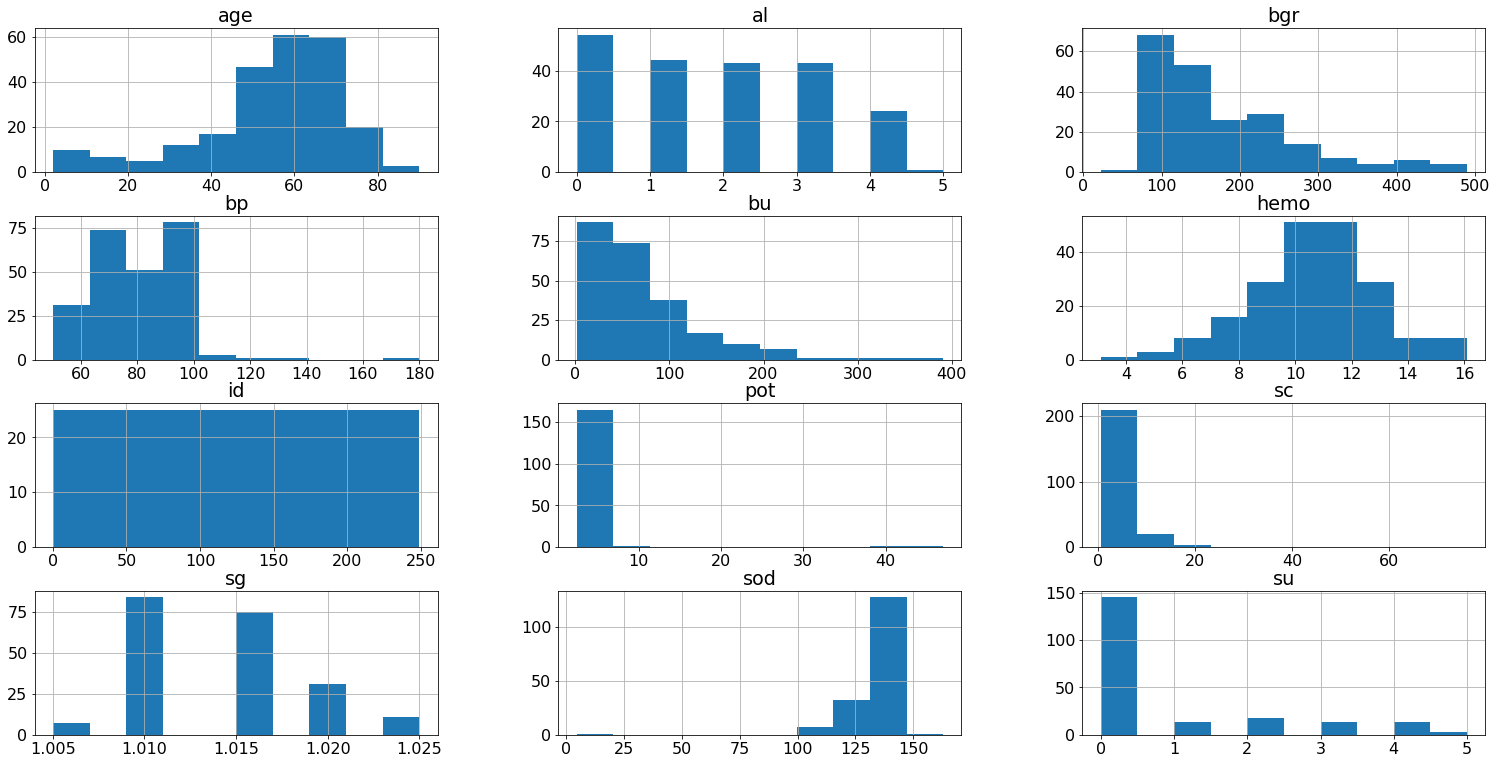

In [3]:
dataframe[dataframe["classification"]=="ckd"].groupby("classification").hist(figsize=(26, 13))

# 1.2.3: Balance

,ckd,notckd
classification,0.625,0.375


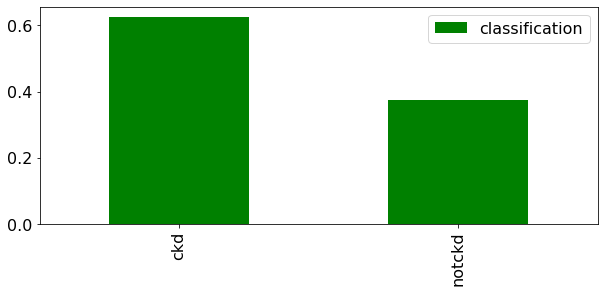

In [4]:
diabetes = dataframe["classification"].value_counts(normalize=True).to_frame()
plt.rcParams['figure.figsize'] = (10.0, 4.0)    # ... and big plots
diabetes.plot.bar(color='g')
diabetes.T

# 1.3: Exploratory Analysis

# 1.3.1: Data type composition

In this section, I will check the data type composition of this database, i.e. to see how many columns are composed by float and int numbers and objects or strings. This was explained already in the introduction to the project.

In [5]:
def count_feature_type(df):
    return df.dtypes.value_counts()

count_feature_type(dataframe)

object     14
float64    11
int64       1
dtype: int64

# 1.3.2: Uniqueness

For the nominal features, it is quite frequent that their values repeat. In this subsection I will check for the uniqueness of these nominal features, to count how many different values they have.

In [6]:
def check_uniqueness(df,cols):
    ### This function checks for unique values within the columns.
    ## Args:
    # df: a data frame. 
    # cols: a list. The columns of data frame to be counted.
    df_nunique = df[cols].nunique().to_frame()
    df_nunique = df_nunique.reset_index().rename(columns={'index': 'Keys',0:'Uniqueness'})
    return df_nunique

check_uniqueness(dataframe,dataframe.select_dtypes(include=['object']).columns)

,Keys,Uniqueness
0,rbc,2
1,pc,2
2,pcc,2
3,ba,2
4,pcv,44
5,wc,92
6,rc,49
7,htn,2
8,dm,5
9,cad,3


# 1.3.3: Duplicate Data
The next step is to look if there are duplicate rows within the dataset and remove them as they are not needed for the analysis. To that end, I will compute how many duplicate rows appear and they will be automatically deleted.

In [7]:
def remove_duplicates(df):
    print("There were " + str(df[df.duplicated()].shape[0]) + " duplicated rows.")
    df = df.drop_duplicates()
    return df

remove_duplicates(dataframe)

There were 0 duplicated rows.


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# 1.3.4: Missing data

I noticed that there are many features where the symbol "NaN" appears, indicating the presence of missing values they were not measured or they could be simply errors while making the database. They appeared as well in the statistical information table in 1.2.1. I will check first which features present missing values.

In [8]:
def check_missing_values(df,cols=None,axis=0):
    ### This function check out for missing values in each column
    ## Arguments:
                #df: data frame
                #cols: list. List of column names
                #axis: int. 0 means column and 1 means row
    
    # This function returns the missing info as a dataframe 
    
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False)

check_missing_values(dataframe,cols=None,axis=0).head(15)

,missing_num,missing_percent
rbc,152,38.00
rc,130,32.50
wc,105,26.25
pot,88,22.00
sod,87,21.75
pcv,70,17.50
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


In [9]:
for el in dataframe.columns:
    if dataframe[el].dtypes=="object" or dataframe[el].dtypes=="int64":
        dataframe[el][dataframe['classification']=="notckd"]=dataframe[el][dataframe['classification']=="notckd"].fillna(dataframe[el][dataframe['classification']=="notckd"].mode()[0])
        dataframe[el][dataframe['classification']=="ckd"]=dataframe[el][dataframe['classification']=="ckd"].fillna(dataframe[el][dataframe['classification']=="ckd"].mode()[0])
    else:
        dataframe[el][dataframe['classification']=="notckd"]=dataframe[el][dataframe['classification']=="notckd"].fillna(np.mean(dataframe[el][dataframe['classification']=="notckd"]))
        dataframe[el][dataframe['classification']=="ckd"]=dataframe[el][dataframe['classification']=="ckd"].fillna(np.mean(dataframe[el][dataframe['classification']=="ckd"]))
        
dataframe

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,3.9,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# 1.3.5: Frequency histograms again

I will plot again the Frequency Histograms to see if there were some changes when filling the missing values.

classification
ckd    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

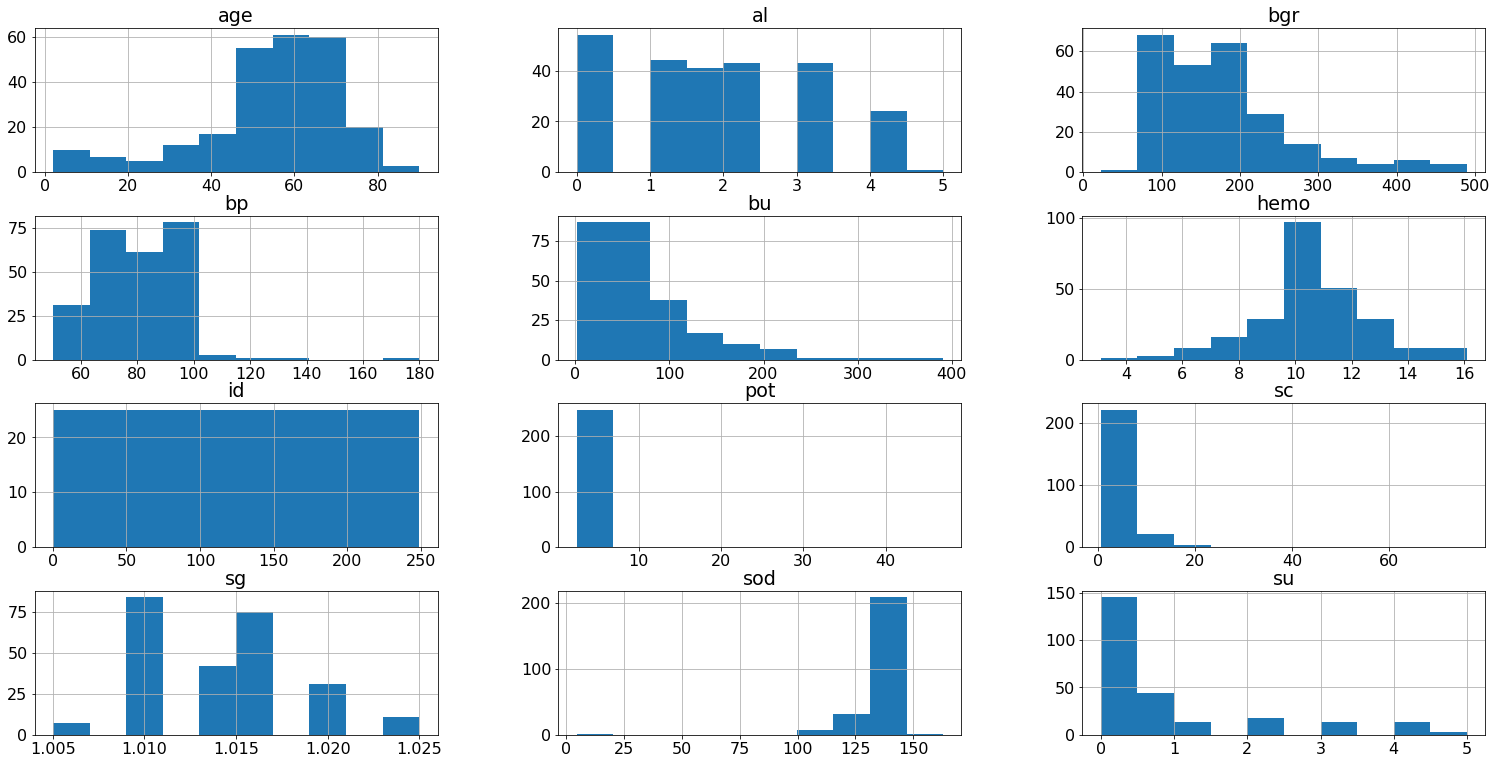

In [10]:
dataframe[dataframe["classification"]=="ckd"].groupby("classification").hist(figsize=(26, 13))

# 1.4: Preparation for the Machine Learning algorithms

In [11]:
# Database cleaning and preparation for the analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataframe['classification'] = dataframe['classification'].replace('ckd', 1)
dataframe['classification'] = dataframe['classification'].replace('notckd', 0)

for el in dataframe.select_dtypes(include=['object']).columns:    
    dataframe[el]=le.fit_transform(dataframe[el].values)
    
dataframe

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,26,56,19,0,3,1,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,19,70,19,0,4,1,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,20,62,19,1,3,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,23,68,27,0,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,35,62,30,0,3,1,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,42,72,44,0,3,1,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,37,61,36,0,3,1,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,39,67,41,0,3,1,0,0,0,0


# 1.4.1: Statistical outliers

In this section I will explore in more details the structure of the data by searching for possible outliers. I will compute the Inter-Quartile-Range (IRQ) to spot the outliers and put a label 1 or 0 for each row, if they are considered as outliers or inliers.

In [12]:
#THIS METHOD IS TO SPOT THE OUTLIERS AND TO GET A CLEANER DATASET TO TRAIN THE ALGORITHMS
    
def STATISTICAL_OUTLIERS(df):
    #HERE WE EXCLUDE FROM THE OUTLIERS DETECTION THE ID OF THE EVENT AND THE USER NAME
    to_train=df.drop(["id","classification"],axis=1)
    #HERE WE ENCODE THE CATEGORICAL FEATURES USING THE LABEL ENCODER
        
    #HERE WE COMPUTE THE FIRST AND THIRD QUANTILES AND THE CORRESPONDING INTER-QUARTILE-RANGE
    Q1 = to_train.quantile(0.25)
    Q3 = to_train.quantile(0.75)
    IQR = Q3 - Q1
    filtering = ((to_train < (Q1-1.5 * IQR)) | (to_train > (Q3 + 1.5 * IQR)))
    #HERE WE DEFINE AS OUTLIERS DE DATAPOINTS OUTSIDE THE INTERQUANTILE RANGE
    outliers=to_train[filtering.any(axis=1)]
    #HERE WE DEFINE A LABEL FOR THE OUTLIERS IN ORDER TO IDENTIFY THEM 
    outliers.loc[:,"outlier"] = 1
    #HERE WE DEFINE AS INLIERS DE DATAPOINTS INSIDE THE INTERQUANTILE RANGE
    innliers=to_train[~filtering.any(axis=1)]
    #HERE WE DEFINE A LABEL FOR THE INLIERS IN ORDER TO IDENTIFY THEM 
    innliers.loc[:,"outlier"] = 0
    #WE CREATE A NEW DATAFRAME WITH THE OUTLIERS AN INLIERS WITH THEIR LABELS
    clean_dataframe = pd.concat([outliers, innliers], sort=False).sort_index()
    #WE RETURN THE DATAFRAME WITH THE NEW COLUMN
    df["outlier"]=clean_dataframe["outlier"]
    return df
    
STATISTICAL_OUTLIERS(dataframe)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,outlier
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,72,34,1,4,1,0,0,0,1,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,56,19,0,3,1,0,0,0,1,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,70,19,0,4,1,1,0,1,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,62,19,1,3,1,1,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,68,27,0,3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,62,30,0,3,1,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,72,44,0,3,1,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,61,36,0,3,1,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,67,41,0,3,1,0,0,0,0,0


              precision    recall  f1-score   support

           0     0.8197    1.0000    0.9009       150
           1     1.0000    0.8680    0.9293       250

    accuracy                         0.9175       400
   macro avg     0.9098    0.9340    0.9151       400
weighted avg     0.9324    0.9175    0.9187       400



Text(0.5, 46.0, 'Actual')

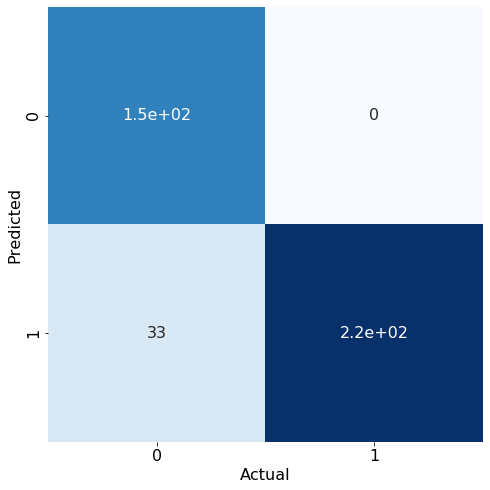

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

statistical_outliers = STATISTICAL_OUTLIERS(dataframe)
print(classification_report(statistical_outliers["classification"],
                            statistical_outliers["outlier"],digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(statistical_outliers["classification"],
                            statistical_outliers["outlier"]), annot=True, square=True, cmap = 'Blues', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')

# 1.4.2: Principal Component Analysis

Since in the previous section I arrived to the conclusion that there were some outliers within the data, in this section I will perform a Principal Component Analysis to visualize the data into a two-dimensional frame in order to check whether it's well clustered or not. The following code does this job in reducing the dimensionality of the dataset and plot it into it's different components.

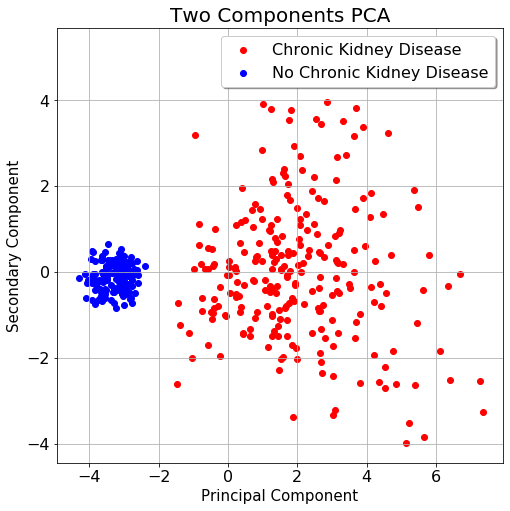

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataframe_pca = STATISTICAL_OUTLIERS(dataframe).drop("outlier",axis=1)
x = dataframe_pca.loc[:, dataframe_pca.columns].values
x = StandardScaler().fit_transform(x)
y = dataframe_pca.loc[:,['classification']].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                                  'principal component 2'])
finalDf = pd.concat([principalDf, dataframe_pca[['classification']]], axis = 1)
finalDfckd = finalDf[finalDf["classification"]==1].drop('classification',axis=1)
finalDfnotckd = finalDf[finalDf["classification"]==0].drop('classification',axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component', fontsize = 15)
ax.set_ylabel('Secondary Component', fontsize = 15)
ax.set_title('Two Components PCA', fontsize = 20)

ax.scatter(finalDfckd["principal component 1"],finalDfckd["principal component 2"],c='r')
ax.scatter(finalDfnotckd["principal component 1"],finalDfnotckd["principal component 2"],c='b')

targets = ['Chronic Kidney Disease', 'No Chronic Kidney Disease']
legend = ax.legend(targets, loc='best', shadow=True)
legend.get_frame().set_facecolor('white')
ax.grid()

# 1.4.3: Correlation Analysis

Last but not least, I will look up for possible correlations within the features. I will show the correlation matrix for the patients with Chronic Kidney Disease.

I will adopt the following criterium:
1. Two features are uncorrelated if the absolute value of their correlation coefficient is less than 0.5.
2. Two features are weakly correlated if the absolute value of their correlation coefficient lies between 0.5 and 0.75.
3. Two features are strongly correlated if the absolute value of their correlation coefficient is higher than 0.75.

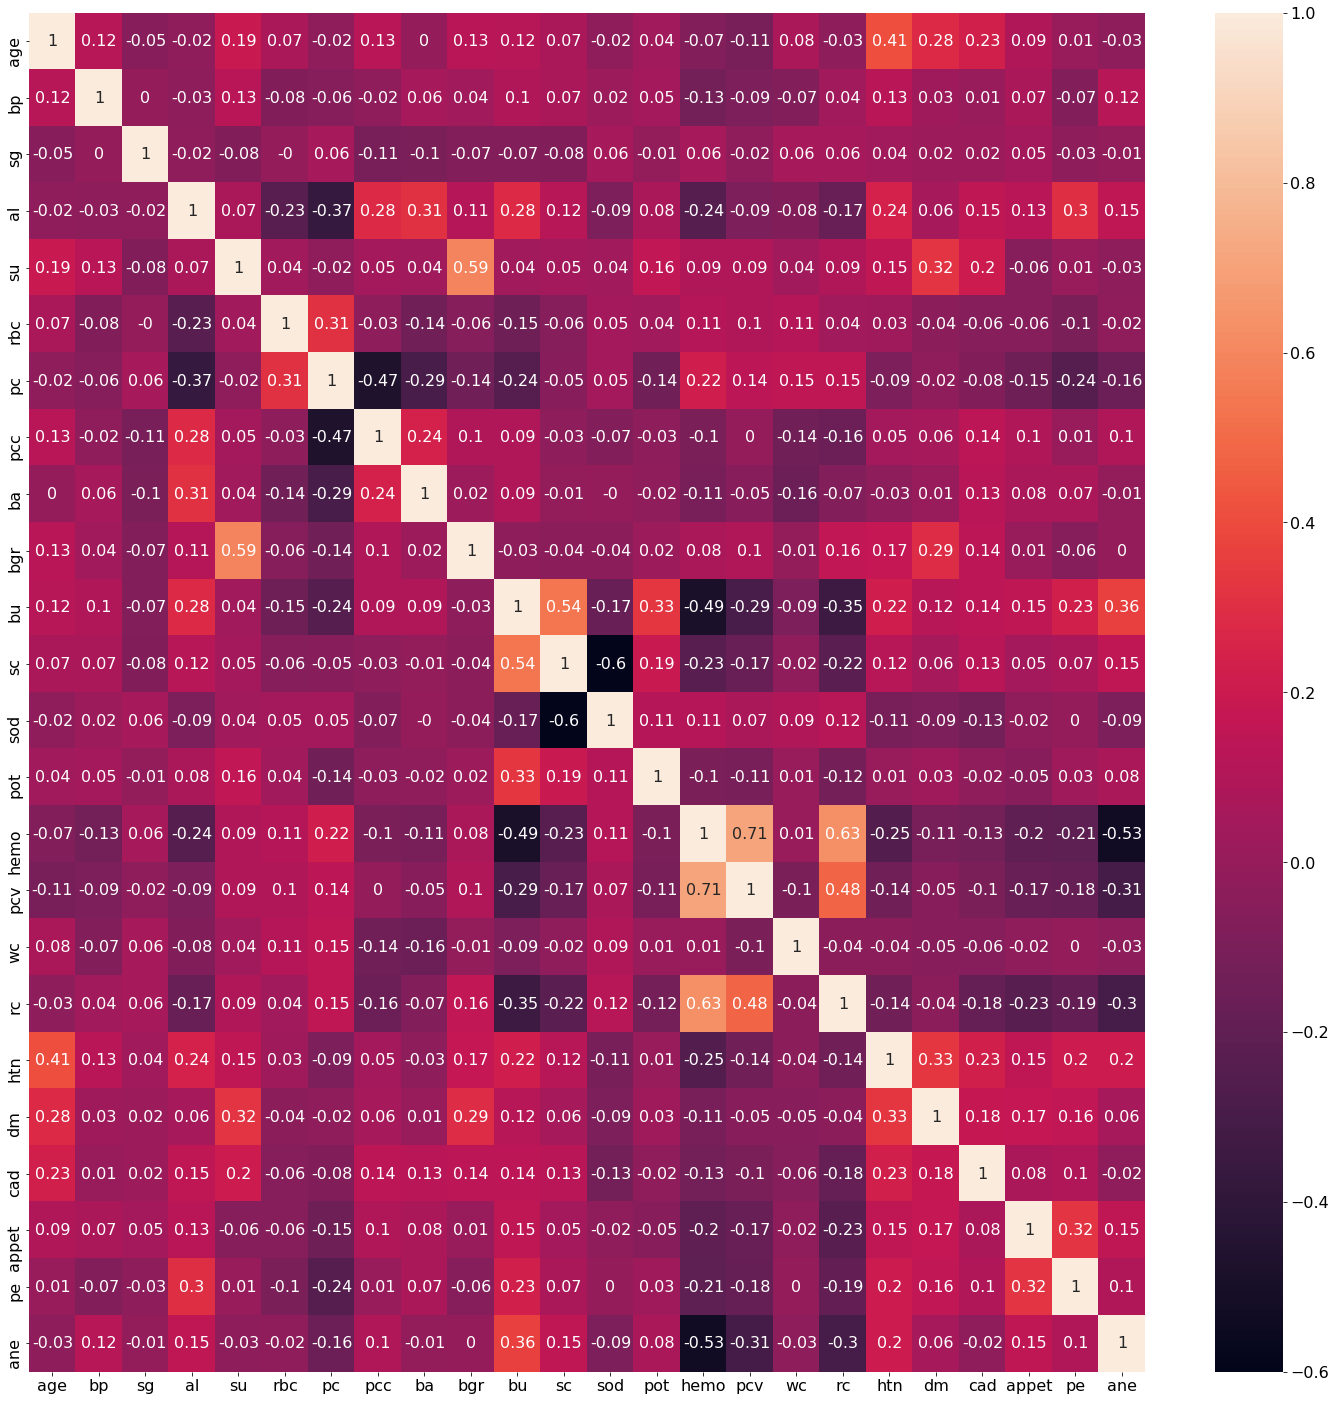

In [15]:
statistical_outliers_ckd = STATISTICAL_OUTLIERS(dataframe)
statistical_outliers_ckd = statistical_outliers_ckd[statistical_outliers_ckd["classification"]==1]
statistical_outliers_ckd = statistical_outliers_ckd.drop(["id","classification","outlier"],axis=1)
plt.figure(figsize = (25,25))
sns.heatmap(round(statistical_outliers_ckd.corr(),2),annot=True)

I can see the presence of some correlations within the data. For example:
1. The levels of Sugar in blood is weakly correlated (+0.59) to the levels of Blood Glucose Random
2. The levels of Blood Urea in blood is weakly correlated (+0.54) to the levels of Serum Creatinine
3. The levels of Serum Creatinine in blood is weakly anti-correlated (-0.60) to the levels of Sodium
4. The levels of Hemoglobin in blood is weakly anti-correlated (-0.53) to the levels of Anemia, weakly correlated (+0.63) to the levels of Red Blood Cell Count, and weakly correlated (+0.71) to the Packed Cell Volume.

# Section 2: Machine Learning

# 2.1: Classification

CPU times: user 894 ms, sys: 112 ms, total: 1.01 s
Wall time: 15 s
CPU times: user 6.71 ms, sys: 0 ns, total: 6.71 ms
Wall time: 6.07 ms
CPU times: user 4.24 ms, sys: 0 ns, total: 4.24 ms
Wall time: 3.8 ms
The best predicting model is AdaBoostClassifier()
The training sample is the: 45.75% of the total amount of data
              precision    recall  f1-score   support

           0     0.9804    1.0000    0.9901       150
           1     1.0000    0.9880    0.9940       250

    accuracy                         0.9925       400
   macro avg     0.9902    0.9940    0.9920       400
weighted avg     0.9926    0.9925    0.9925       400



Text(0.5, 46.0, 'Actual')

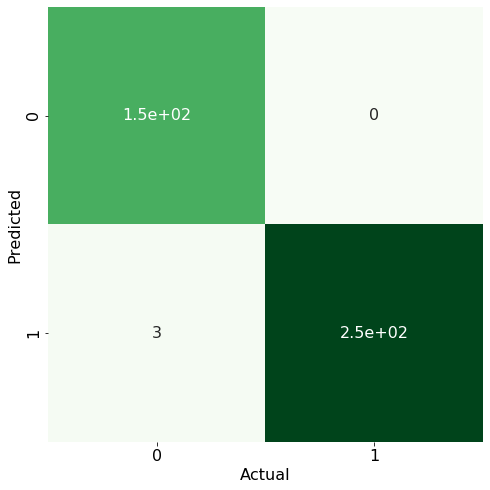

In [16]:
from ML_DL_Toolbox import ML_DL_Toolbox
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

dataframe = STATISTICAL_OUTLIERS(dataframe)
to_train = dataframe[dataframe["outlier"]==0].drop("outlier",axis=1)

%time model = ML_DL_Toolbox().gets_best_model(to_train,"classification")
%time classifier = model.fit(to_train.drop("classification",axis=1), to_train["classification"])
%time Y_pred_algo = classifier.predict(dataframe.drop(["outlier","classification"],axis=1))
print("The best predicting model is", model)
print("The training sample is the: "+str(len(to_train)/len(dataframe)*100)+"% of the total amount of data")
print(classification_report(dataframe["classification"], Y_pred_algo,digits=4))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(dataframe["classification"], Y_pred_algo), annot=True, square=True, cmap = 'Greens', cbar=False)
plt.ylabel('Predicted')
plt.xlabel('Actual')

# Conclusions

In [17]:
patients = dataframe["classification"] - Y_pred_algo
[i for i, e in enumerate(patients) if e != 0]

[247, 248, 249]